#Name - Arjun A.
#Roll number - 181CO109
#Date of submission - 26-02-2021
This notebook was written in google colab. <br>Link to view notebook<br>
https://colab.research.google.com/drive/19wD264NWDtmadec5Wo2f-4M_zLy3apVI?usp=sharing

#ML Lab 6 - KNN algorithm
This notebook is used to implement the kth Nearest Neighbours algorithm to classify the iris dataset. 

##Importing necessary packages


In [1]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
from sklearn.metrics import confusion_matrix
import numpy as np 
import matplotlib.pyplot as plt 

##Loading the iris dataset

In [2]:
irisData = load_iris() 
X = irisData.data 
y = irisData.target 

##Splitting the data into train and test sets
 Splitting the data in the ratio of 7:3. (70% training and 30% testing)

In [3]:
def splitdataset(X, Y): 

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) #Specifying random_state to get the same dataset split everytime 
	
  return X, Y, X_train, X_test, y_train, y_test 

In [4]:
X, Y, X_train, X_test, y_train, y_test = splitdataset(X, y)

#Use to print the entire dataset
#print(X, Y, X_train, X_test, y_train, y_test, sep = '\n\n')

#Printing size of the split
print('Test dataset size\nX_test -', len(X_test), '\ny_test -', len(y_test), '\n')
print('Train dataset size\nX_train -', len(X_train), '\ny_train -', len(y_train))

Test dataset size
X_test - 45 
y_test - 45 

Train dataset size
X_train - 105 
y_train - 105


##Considering all k values from 1 to 10

In [5]:
knn = []
for i in range(1, 11):
  knnModel = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
  knn.append(knnModel) 

##Training all models on the train dataset

In [6]:
for i in range(10):
  knn[i].fit(X_train, y_train) 

##Finding accuracy for all models using the test dataset

In [7]:
accuracyKNN = []
for i in range(10):
  print('k = {}'.format(i + 1))
  print(knn[i])
  accuracyKNN.append(knn[i].score(X_test, y_test))
  y_pred = knn[i].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print()

k = 1
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]

k = 2
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]

k = 3
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]

k = 4
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
[[16  0  0]
 [ 0 11  0]
 [ 0  2 16]]

k = 5
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean

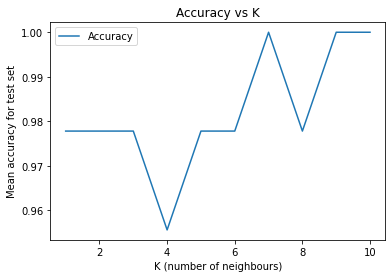

In [8]:
fig = plt.figure()
ax = plt.axes()
plt.plot([1,2,3,4,5,6,7,8,9,10], accuracyKNN, label = 'Accuracy')
plt.xlabel('K (number of neighbours)')
plt.ylabel('Mean accuracy for test set')
plt.title('Accuracy vs K')
plt.legend()
plt.savefig('181CO109 KNN accuracy graph.pdf')
plt.show()